In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('points.pkl', 'rb') as f:
    y_pred, y_true = pickle.load(f)

In [3]:
os.chdir('../')
from train import confusionmat

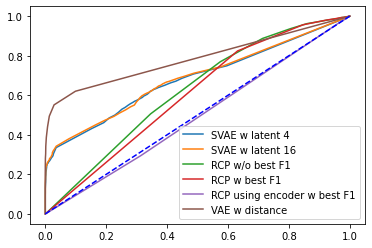

In [4]:
bins = 100

names = ['test3/14','test3/15','test4/00','test4/01','test4/02','test4/03']
propernames = {'test3/14': 'SVAE w latent 4','test3/15': 'SVAE w latent 16',
'test4/00':'RCP w/o best F1','test4/01':'RCP w best F1','test4/02':'RCP using encoder w best F1','test4/03':'VAE w distance'}

for m in names:
    y_p, y_t = y_pred[m], y_true[m]
    y_p, y_t = np.expand_dims(y_p,-1), np.expand_dims(y_t,-1)
    y_p = np.nan_to_num(y_p)
    y_p = (y_p - y_p.min())/(y_p.max() - y_p.min())
    tprs = []
    fprs = []
    for b in range(bins+1):
        cm = confusionmat(y_p, y_t, conf = b/bins)
        tpr = cm[1,1]/(cm[1,1] + cm[0,1])
        fpr = cm[1,0]/(cm[0,0] + cm[1,0])
        tprs.append(tpr)
        fprs.append(fpr)
    plt.plot(fprs, tprs, label = f'{propernames[m]}')
plt.plot([0,1],[0,1], 'b--')
plt.legend()

In [12]:

y_p, y_t = y_pred['test4/02'], y_true['test4/02']
y_p, y_t = np.expand_dims(y_p,-1), np.expand_dims(y_t,-1)
y_p = np.nan_to_num(y_p)
tprs = []
fprs = []
for b in range(bins+1):
    cm = confusionmat(y_p, y_t, conf = b/bins)
    tpr = cm[1,1]/(cm[1,1] + cm[0,1])
    fpr = cm[1,0]/(cm[0,0] + cm[1,0])
    tprs.append(tpr)
    fprs.append(fpr)
    print(b/bins)
    print(cm)

0.0
[[ 153.  145.]
 [4847. 4855.]]
0.01
[[3409. 3502.]
 [1591. 1498.]]
0.02
[[3409. 3505.]
 [1591. 1495.]]
0.03
[[3409. 3505.]
 [1591. 1495.]]
0.04
[[3411. 3506.]
 [1589. 1494.]]
0.05
[[3411. 3508.]
 [1589. 1492.]]
0.06
[[3413. 3508.]
 [1587. 1492.]]
0.07
[[3416. 3509.]
 [1584. 1491.]]
0.08
[[3416. 3510.]
 [1584. 1490.]]
0.09
[[3416. 3510.]
 [1584. 1490.]]
0.1
[[3418. 3512.]
 [1582. 1488.]]
0.11
[[3419. 3514.]
 [1581. 1486.]]
0.12
[[3419. 3515.]
 [1581. 1485.]]
0.13
[[3420. 3515.]
 [1580. 1485.]]
0.14
[[3421. 3515.]
 [1579. 1485.]]
0.15
[[3423. 3515.]
 [1577. 1485.]]
0.16
[[3424. 3515.]
 [1576. 1485.]]
0.17
[[3424. 3515.]
 [1576. 1485.]]
0.18
[[3426. 3515.]
 [1574. 1485.]]
0.19
[[3427. 3515.]
 [1573. 1485.]]
0.2
[[3427. 3515.]
 [1573. 1485.]]
0.21
[[3428. 3515.]
 [1572. 1485.]]
0.22
[[3428. 3515.]
 [1572. 1485.]]
0.23
[[3429. 3516.]
 [1571. 1484.]]
0.24
[[3429. 3516.]
 [1571. 1484.]]
0.25
[[3429. 3516.]
 [1571. 1484.]]
0.26
[[3429. 3516.]
 [1571. 1484.]]
0.27
[[3430. 3516.]
 [1570. 148

In [13]:
y_p

array([[0.91861093],
       [0.70425892],
       [0.76072866],
       ...,
       [0.        ],
       [0.        ],
       [0.99720812]])